# Popular Data Science Question Category

In this project, we'll utilize [**Data Science Stack Exchange**](https://datascience.stackexchange.com/) to identify the most relevant topics of interest to guide a data science education company in creating content that aligns with the preferences of the audience. The content can be in the form of books, online articles, videos or interactive text. We have been tasked with determining the best content to write about for maximum user engagement.

![Image](datascience2.jpg)

## Table of Contents
<hr>

 - Why Stack Exchange
 - Data Science Stack Exchange
 - The Stack Exchange Data Explorer
 - Exploring the Data
 - Most Used and Most Viewed
 - Relations Between Tags
 - Enter Domain Knowledge
 - The Trend of Deep Learning
 - Conclusion
 - Recommendations and Limitations

## Why Stack Exchange?
<hr>

![Image](https://upload.wikimedia.org/wikipedia/commons/7/75/Stack_Exchange_logo_and_wordmark.svg)

We decided to collect data from Stack Exchange for the following reasons:

1. **Relevance**: Data Science is a multidisciplinary field, and Stack Exchange provides a couple of websites that are relevant to our goal. Examples include:
  >- [Data Science](https://datascience.stackexchange.com/)
  >- [Cross Validated](https://stats.stackexchange.com/) — a statistics site
  >- [Artificial Intelligence](https://ai.stackexchange.com/)
  >- [Mathematics](https://math.stackexchange.com/)
  >- [Stack Overflow](https://stackoverflow.com/)
2. **It is easy to identify good posts**: Stack Exchange uses a reputation award system for its questions and answers. Each post is subject to upvotes and downvotes, making it easy to identify posts that users engage with and love.
3. **Established posting guidelines**: Stack Exchange's Data Science help center states that questions should be objective, practical about Data Science, specific and relevant to other users.

These attributes make Stack Exchange a good data source for our needs.

## Data Science Stack Exchange
<hr>

According to [section on questions](https://datascience.stackexchange.com/help/asking)'s help center's section on questions, we acknowleged what kind of questions are welcome on site, and informed us that apart from the sites mentioned in the Learn section, there are two other relevant sites:

 - [Open Data](https://opendata.stackexchange.com/help/on-topic) 
 - [Computational Science](https://scicomp.stackexchange.com/help/on-topic) 
 
**DSSE's Home Subdivide**
 
On the [home page](https://datascience.stackexchange.com/) we can see that we have four sections:

 - [Questions](https://datascience.stackexchange.com/questions) — a list of all questions asked;

 - [Tags](https://datascience.stackexchange.com/tags) — a list of tags (keywords or labels that categorize questions);
![Tags](https://lh3.googleusercontent.com/drive-viewer/AITFw-yg0X4GeE9DDs4__-z2TTiDSW7QVUuSIT0X6P2vr-L3nNl1sdDLJ__-49VM7TyTEVXwVN10GGo6irV5TYwx_WIkApJV=s1600)

 - [Users](https://datascience.stackexchange.com/users) — a list of users;

 - [Unanswered](https://datascience.stackexchange.com/unanswered) — a list of unanswered questions;

## The Stack Exchange Data Explorer
<hr>

Each of Stack Exchange's websites offers a publicly accessible database. You can utilize this link to conduct queries and delve into the Data Science Stack Exchange database for insights into posts. Keep in mind that the database is optimized for querying using the Transact-SQL (Microsoft SQL) dialect.

Examining the list of table names, a couple of them catch our attention due to their relevance to our objective:

 >- Posts
 >- PostTags
 >- Tags
 >- TagSynonyms
 
After conducting initial exploratory queries, we narrow down our attention to the `Posts` table. While the `Tags` table seemed promising by revealing the frequency of tag usage, it lacks the ability to distinguish whether the interest in these tags is recent or a historical trend.

## Exploring the Data
<hr>

Now let's read in the data.

In [1]:
# We import everything that we'll use

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

file_path = './Downloads/2019_questions.csv'
questions = pd.read_csv(file_path,  parse_dates=["CreationDate"])

In [2]:
questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Id             8839 non-null   int64         
 1   CreationDate   8839 non-null   datetime64[ns]
 2   Score          8839 non-null   int64         
 3   ViewCount      8839 non-null   int64         
 4   Tags           8839 non-null   object        
 5   AnswerCount    8839 non-null   int64         
 6   FavoriteCount  1407 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 483.5+ KB


From the info above, we see that only `FavoriteCount` has missing values. A missing value on this column probably means that the question was is not present in any users' favorite list, so we can replace the missing values with zero.

The types are adequate for each column. After we fill in the missing values on `FavoriteCount`, there is no reason to store the values as floats.

Let's see what types the objects in `questions["Tags"]` are. 

In [3]:
questions["Tags"].apply(lambda value: type(value)).unique()

array([<class 'str'>], dtype=object)

In [4]:
# Fill missing values in the 'FavoriteCount' column with 0
questions.fillna(value={"FavoriteCount": 0}, inplace=True)
questions["FavoriteCount"] = questions["FavoriteCount"].astype(int)
questions.dtypes

Id                        int64
CreationDate     datetime64[ns]
Score                     int64
ViewCount                 int64
Tags                     object
AnswerCount               int64
FavoriteCount             int64
dtype: object

Let's now modify `Tags` to make it easier to work with.

In [5]:
# Remove '<' and '>' symbols from each tag, then split the string into a list of tags
questions["Tags"] = questions["Tags"].str.replace("^<|>$", "").str.split("><")
questions.sample(5)

/var/folders/99/7yckmfv97673c36zs7tfc3gh0000gn/T/ipykernel_56073/3406325479.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  questions["Tags"] = questions["Tags"].str.replace("^<|>$", "").str.split("><")


,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
6794,53410,2019-06-07 19:09:19,0,159,"[pandas, data-cleaning]",1,0
2377,58494,2019-09-01 07:35:22,1,14,"[sampling, variance]",0,2
2230,46422,2019-02-28 20:36:51,1,63,"[python, keras, rnn]",0,0
5377,51946,2019-05-14 07:00:14,6,421,"[keras, tools]",2,1
3450,48629,2019-04-04 19:17:30,1,71,"[r, time-series, forecasting]",2,1


## Most Used and Most Viewed
<hr>

Let's start by counting how many times each tag was used.

In [6]:
tag_count = dict()

for tags in questions["Tags"]:
    for tag in tags:
        if tag in tag_count:
            tag_count[tag] += 1
        else:
            tag_count[tag] = 1

For better visual presentation, let's convert `tag_count` into a DataFrame.

In [7]:
tag_count = pd.DataFrame.from_dict(tag_count, orient="index")
tag_count.rename(columns={0: "Count"}, inplace=True)
tag_count.head(10)

,Count
machine-learning,2693
data-mining,217
regression,347
linear-regression,175
regularization,50
python,1814
time-series,466
forecast,34
forecasting,85
scikit-learn,540


Let's now sort this dataframe by Count and visualize the top 20 results.

In [8]:
most_used = tag_count.sort_values(by="Count", ascending=False).head(20)
most_used

,Count
machine-learning,2693
python,1814
deep-learning,1220
neural-network,1055
keras,935
classification,685
tensorflow,584
scikit-learn,540
nlp,493
cnn,489


popularity of the tags rapidly declines, so that's enough to help us with analysis. Let's visualize these data.

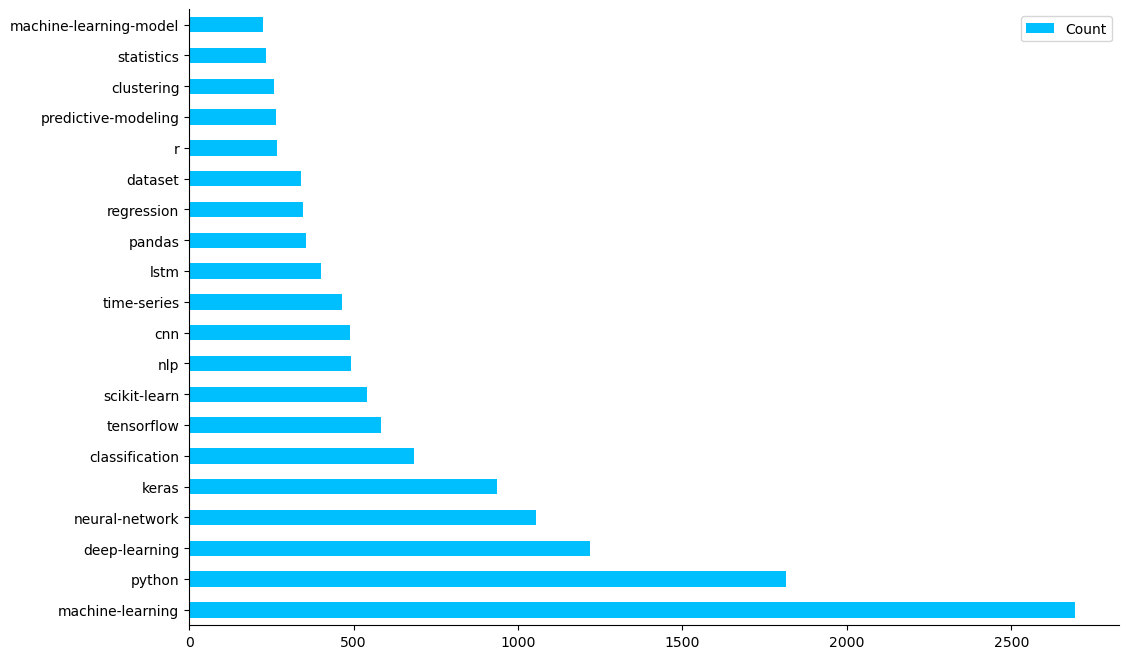

In [9]:
most_used_reversed = most_used.iloc[::-1]

# Create the horizontal bar chart
most_used.plot(kind="barh", figsize=(12,8), color= "deepskyblue")

# Remove top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

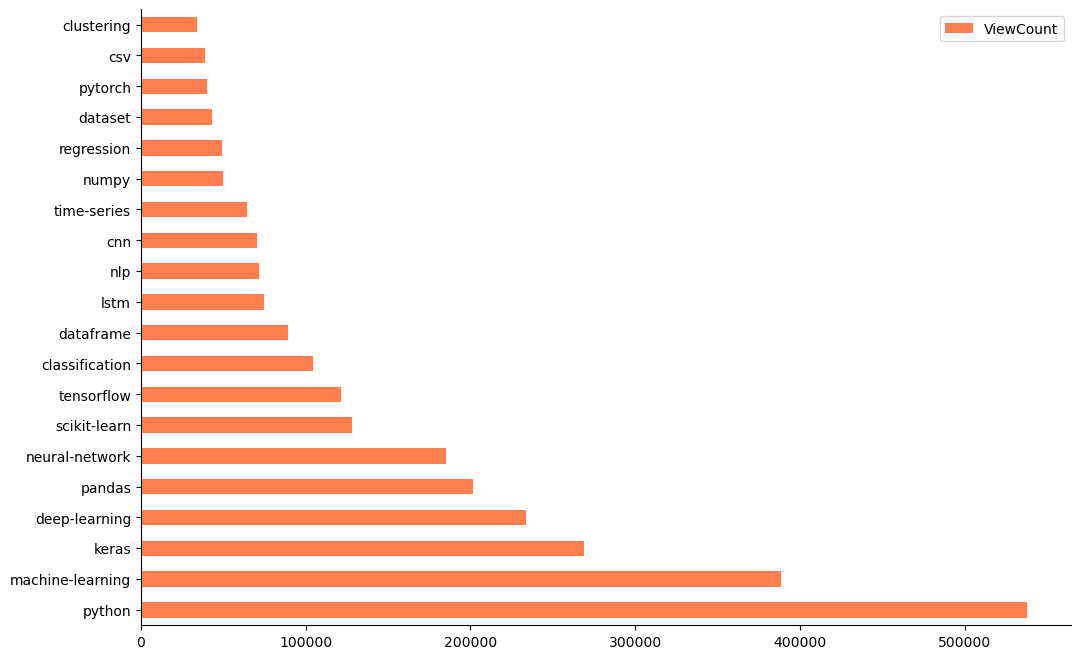

In [10]:
# Iterates through each row in the dataframe questions
tag_view_count = dict()

for index, row in questions.iterrows():
    for tag in row['Tags']:
        if tag in tag_view_count:
            tag_view_count[tag] += row['ViewCount']
        else:
            tag_view_count[tag] = row['ViewCount']
            
tag_view_count = pd.DataFrame.from_dict(tag_view_count, orient="index")
tag_view_count.rename(columns={0: "ViewCount"}, inplace=True)

most_viewed = tag_view_count.sort_values(by="ViewCount").tail(20)
most_viewed_reversed = most_viewed.iloc[::-1]

# Create the horizontal bar chart
most_viewed_reversed.plot(kind="barh", figsize=(12,8), color= "coral")

# Remove top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

Let's review them side by side.

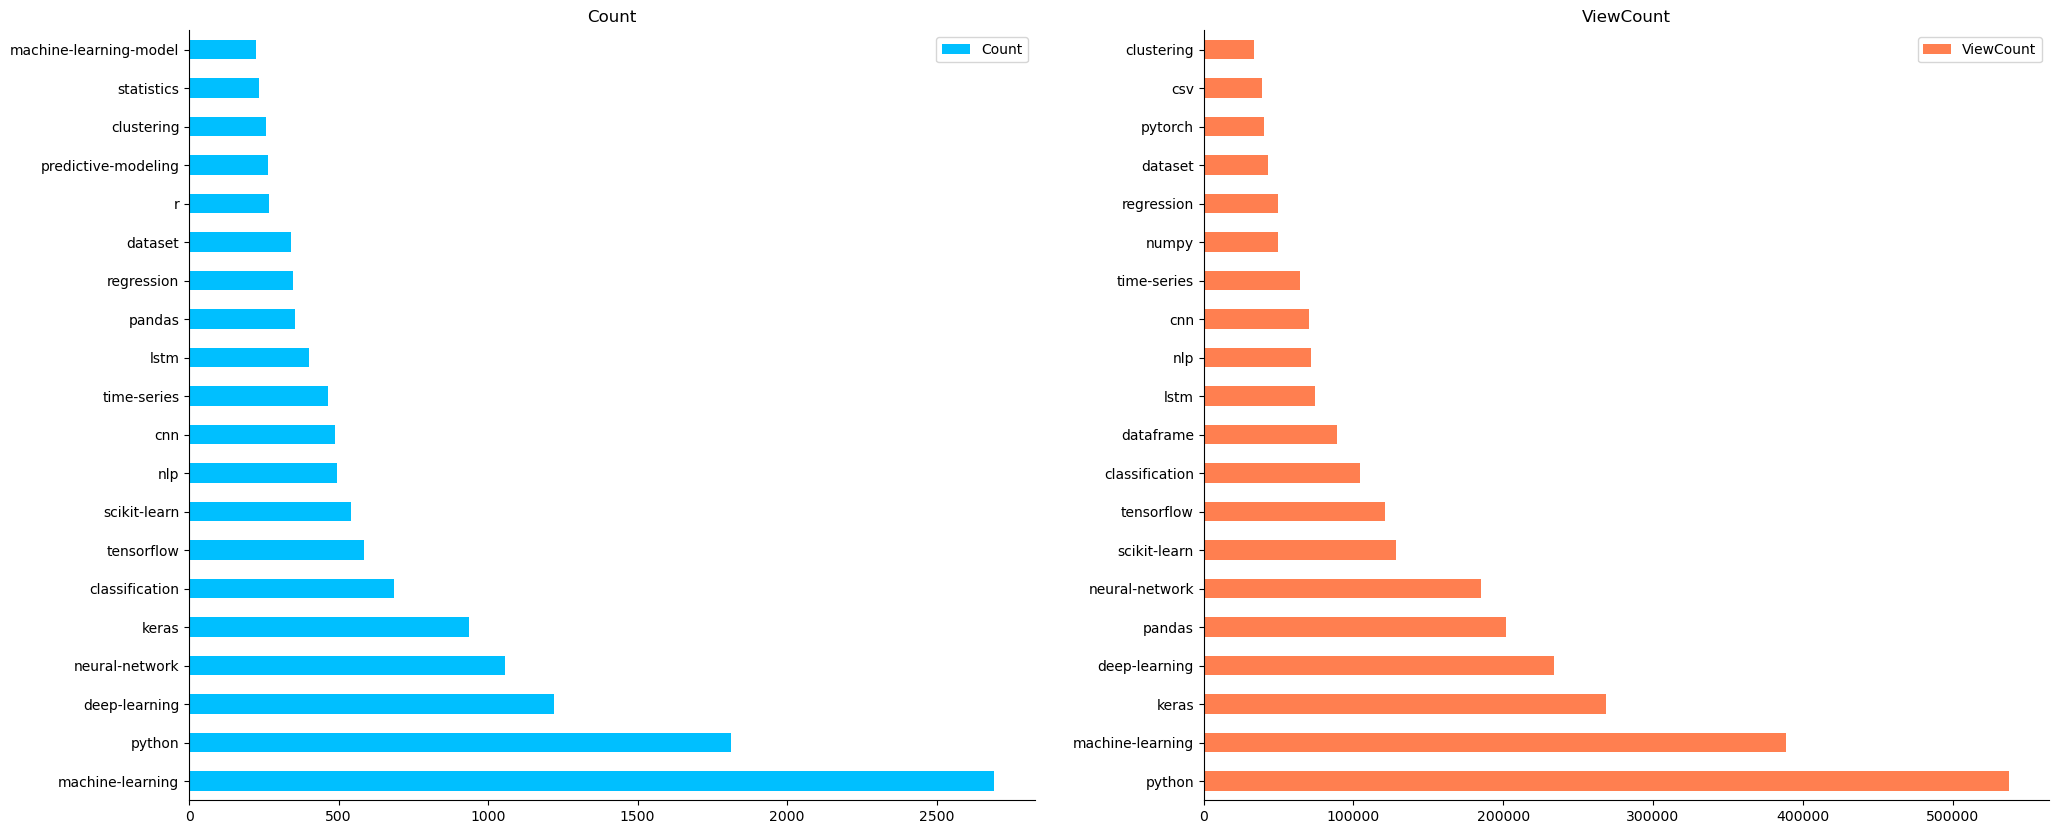

In [11]:
# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches((24, 10))

# Create the first horizontal bar chart
most_used.plot(kind="barh", ax=axes[0], subplots=True, color='deepskyblue')

# Remove bottom and right spines from the first subplot
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)

# Create the second horizontal bar chart
most_viewed_reversed.plot(kind="barh", ax=axes[1], subplots=True, color='coral')

# Remove top and right spines from the second subplot
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)

plt.show()

In this step, we analyzed the data and came up with the top 20 most used and most viewed tags. We created two subplots based on the respective dataframes to compare side by side. There are many overlapped tags, but they are also distinct tags.

In [12]:
in_used = pd.merge(most_used, most_viewed, how="left", left_index=True, right_index=True)
in_used

,Count,ViewCount
machine-learning,2693,388499.0
python,1814,537585.0
deep-learning,1220,233628.0
neural-network,1055,185367.0
keras,935,268608.0
classification,685,104457.0
tensorflow,584,121369.0
scikit-learn,540,128110.0
nlp,493,71382.0
cnn,489,70349.0


In [13]:
in_viewed = pd.merge(most_used, most_viewed, how="right", left_index=True, right_index=True)
in_viewed

,Count,ViewCount
clustering,257.0,33928
csv,NaN,38654
pytorch,NaN,40240
dataset,340.0,43151
regression,347.0,49451
numpy,NaN,49767
time-series,466.0,64134
cnn,489.0,70349
nlp,493.0,71382
lstm,402.0,74458


## Relations Between Tags
<hr>

An approach to understand the relationship between pairs of tags, is to count how many time these pairs appearing together. To start, we'll generate a list containing all the tags.

In [14]:
all_tags = list(tag_count.index)

We'll now create a dataframe where each row will represent a tag, and each column as well.

In [15]:
associations = pd.DataFrame(index=all_tags, columns=all_tags)
associations.iloc[0:4,0:4]

,machine-learning,data-mining,regression,linear-regression
machine-learning,NaN,NaN,NaN,NaN
data-mining,NaN,NaN,NaN,NaN
regression,NaN,NaN,NaN,NaN
linear-regression,NaN,NaN,NaN,NaN


Next, we'll fill this DataFrame with zeros. Then, for each set of tags in the `questions["Tags"]`, we'll increase the count for the tags that appear between them by one. This process will provides us with the frequency of usage for each tag pair, indicating how frequently they were used together.

In [16]:
associations.fillna(0, inplace=True)

for tags in questions["Tags"]:
    associations.loc[tags, tags] += 1

This dataframe is quite large. Let's focus our attention on the most used tags.

In [17]:
# Extract the sub-dataframe for the most used labels
relations_most_used = associations.loc[most_used.index, most_used.index]

# Define a function to apply styling to cells
def style_cells(x):
    # Create a helper DataFrame to store styles
    helper_df = pd.DataFrame('', index=x.index, columns=x.columns)
    # Apply yellow background to cells where row or column label is "time-series"
    helper_df.loc["time-series", "r"] = "background-color: yellow"
    helper_df.loc["r", "time-series"] = "background-color: yellow"
    # Apply blue text color to diagonal cells
    for k in range(helper_df.shape[0]):
        helper_df.iloc[k,k] = "color: blue"
        
    return helper_df

relations_most_used.style.apply(style_cells, axis=None)

,machine-learning,python,deep-learning,neural-network,keras,classification,tensorflow,scikit-learn,nlp,cnn,time-series,lstm,pandas,regression,dataset,r,predictive-modeling,clustering,statistics,machine-learning-model
machine-learning,2693,499,429,366,195,259,106,188,113,124,131,71,62,119,99,63,123,61,89,139
python,499,1814,160,137,280,98,167,235,71,62,105,61,244,59,53,24,35,45,35,37
deep-learning,429,160,1220,305,247,59,136,16,72,160,44,103,1,21,32,5,32,2,12,19
neural-network,366,137,305,1055,235,65,108,24,24,118,33,69,1,42,20,9,13,8,11,10
keras,195,280,247,235,935,58,256,34,23,116,51,133,3,31,13,10,11,0,3,17
classification,259,98,59,65,58,685,20,47,35,20,25,20,3,34,28,10,27,12,19,21
tensorflow,106,167,136,108,256,20,584,15,11,57,9,43,3,9,9,1,6,0,0,9
scikit-learn,188,235,16,24,34,47,15,540,12,0,12,2,37,37,9,1,12,24,6,18
nlp,113,71,72,24,23,35,11,12,493,7,0,19,3,2,11,4,1,9,3,4
cnn,124,62,160,118,116,20,57,0,7,489,8,24,1,6,11,2,6,0,1,4


The yellow-highlighted cells means that `time-series` was used with `r` for 22 times. The blue-colored values provide each tag's usage frequency. This aligns with our earlier observation, where `machine-learning` appeared 2693 times. 

It's not easy for a human to understand what is going on in this dataframe. So let's create a heatmap to make it more visual. But before we do it, let's remove the blue-colored values to avoid skewing the color distribution. This step will ensure that the colors remain balanced and visually informative.

In [18]:
# Set diagonal cells to NaN to remove it
for i in range(relations_most_used.shape[0]):
    relations_most_used.iloc[i,i] = pd.np.NaN

/var/folders/99/7yckmfv97673c36zs7tfc3gh0000gn/T/ipykernel_56073/2340823853.py:3: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  relations_most_used.iloc[i,i] = pd.np.NaN


<AxesSubplot:>

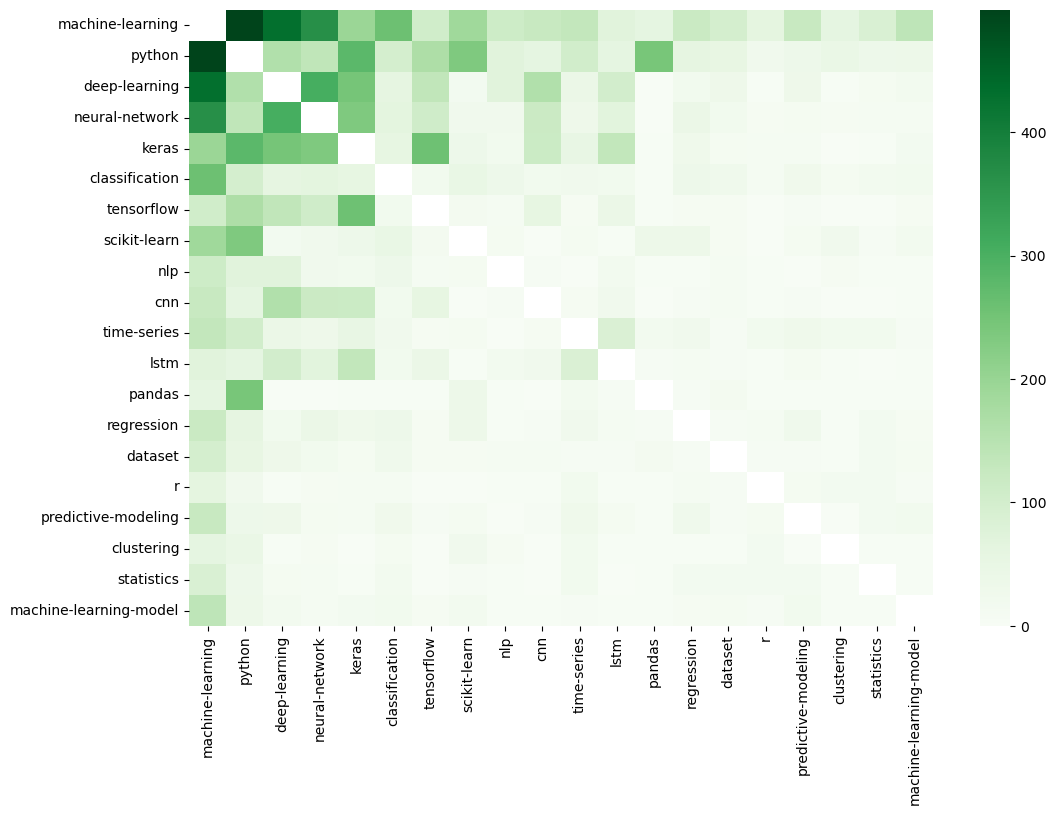

In [19]:
plt.figure(figsize=(12,8))
sns.heatmap(relations_most_used, cmap="Greens", annot=False)

The most used tags located in the top-left part by the dark concentration, which have the strongest relationships. However, these tags could also used together without having any strong relation between them. As these tags are just being used a lot and ending up being used together.

Another shortcoming could be that it only focus on relationships between pairs, rather than interactions among multiple group of tags. For example, It could be the case that when used together, `dataset` and `scikit-learn` have a "strong" relation to `pandas`, but each by itself doesn't.

We can use [association rules](https://en.wikipedia.org/wiki/Association_rule_learning)(a powerful data mining technique) to handle this problem. Association rules allow us to analytically spot relations among groups, and measure how strong the relations are on several fronts, as how common, how strong, how independent it is.

## Enter Domain Knowledge
<hr>

Collecting information from the DSSE website, as well as other external sources yields the following information on the most popular tags.

 - **Machine Learning**: *A subfield of computer science that draws on elements from algorithmic analysis, computational statistics, mathematics, optimization, etc. It is mainly concerned with the use of data to construct models that have high predictive/forecasting ability ([source](https://datascience.stackexchange.com/questions/tagged/machine-learning)).*
 - **Deep learning**: *A new area of <span style="color:red">Machine Learning</span> research concerned with the technologies used for learning hierarchical representations of data, mainly done with deep neural networks (i.e. networks with two or more hidden layers), but also with some sort of Probabilistic Graphical Models ([source](https://datascience.stackexchange.com/questions/tagged/deep-learning)).*
 - **Neural networks**: *Neural networks make up the backbone of <span style="color:red">deep learning</span> algorithms. Specifically called artificial neural networks (ANNs), they are designed to mimic the human brain through a set of algorithms ([source](https://www.ibm.com/blog/ai-vs-machine-learning-vs-deep-learning-vs-neural-networks/)).*
 - **Natural Language Processing (NLP)**: *Involves using <span style="color:red">machine learning</span>, <span style="color:red">deep learning</span> (in recent trends) algorithms and “narrow” artificial intelligence (AI) to understand the meaning of text documents ([source](https://www.lexalytics.com/blog/machine-learning-natural-language-processing/)).*
 - **Classification**: *A subset of <span style="color:red">machine learning</span> (supervised learning), that identifies the category or categories which a new instance of dataset belongs ([source](https://datascience.stackexchange.com/questions/tagged/classification)).*
 - **TensorFlow**: *TensorFlow is an open source library for <span style="color:red">machine learning</span>, <span style="color:red">deep learning</span> and machine intelligence ([source](https://datascience.stackexchange.com/questions/tagged/tensorflow)).*
 - **Keras**: *A popular, open-source <span style="color:red">deep learning</span> API for Python built on top of TensorFlow and is useful for fast implementation ([source](https://datascience.stackexchange.com/questions/tagged/keras)).*
 - **Scikit-learn**: *A popular <span style="color:red">machine learning</span> package for Python that has simple and efficient tools for predictive data analysis ([source](https://datascience.stackexchange.com/questions/tagged/scikit-learn)).*

Most of the top tags are associated with machine learning in one way or another. This explains our earlier observation, where most of the tags were combined with machine learning. Since machine learning is a broad field, and python could be generic to many applications, the interesting topic here appears to be the relatively narrower alternative - **Deep learning**.

In otherwords, we can say that the most popular topic on DSSE from year 2021 till date is deep learning.

## The Trend of Deep Learning

![Image](datascience1.jpg)

Let's read in the file into a dataframe called all_q. We'll parse the dates at read-time, and clean the tags column.

In [20]:
all_q = pd.read_csv("./Downloads/all_questions.csv", parse_dates=["CreationDate"])
all_q["Tags"] = all_q["Tags"].str.replace("^<|>$", "").str.split("><")

/var/folders/99/7yckmfv97673c36zs7tfc3gh0000gn/T/ipykernel_56073/2775116235.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  all_q["Tags"] = all_q["Tags"].str.replace("^<|>$", "").str.split("><")


We compiled a list to categorize the tags relevant to Deep Learning:`["lstm", "cnn", "scikit-learn", "tensorflow", "keras", "neural-network", "deep-learning"]`.

Now let's create a function that assigns 1 to deep learning questions and 0 to others.

In [21]:
def class_deep_learning(tags):
    for tag in tags:
        if tag in ["lstm", "cnn", "scikit-learn", "tensorflow",
                   "keras", "neural-network", "deep-learning"]:
            return 1
    return 0

In [22]:
all_q["DeepLearning"] = all_q["Tags"].apply(class_deep_learning)

In [23]:
all_q.sample(5)

,Id,CreationDate,Tags,DeepLearning
6871,6052,2015-06-09 13:49:57,"[python, nlp, text-mining]",0
13303,43689,2019-01-08 21:51:06,"[regression, feature-extraction, feature-engin...",0
597,24560,2017-11-10 10:07:25,"[machine-learning, scikit-learn, pandas, k-means]",1
3666,56900,2019-08-03 16:43:52,"[machine-learning, computer-vision, image-reco...",0
11221,20058,2017-06-29 11:42:16,"[machine-learning, python, deep-learning, tens...",1


Now we have it! Let's make it more persuasive by tracking it quarterly. Since we don't have all the initial quarter of 2020, we will exclude those dates.

In [24]:
all_q = all_q[all_q["CreationDate"].dt.year < 2020]

We'll create a column that designates the quarter. To begin with, let's create a function for generating the quarter data.

In [25]:
def fetch_quarter(datetime):
    year = str(datetime.year)[-2:]
    quarter = str(((datetime.month-1) // 3) + 1)
    return "{y}Q{q}".format(y=year, q=quarter)

all_q["Quarter"] = all_q["CreationDate"].apply(fetch_quarter)

In [26]:
all_q.head()

,Id,CreationDate,Tags,DeepLearning,Quarter
0,45416,2019-02-12 00:36:29,"[python, keras, tensorflow, cnn, probability]",1,19Q1
1,45418,2019-02-12 00:50:39,[neural-network],1,19Q1
2,45422,2019-02-12 04:40:51,"[python, ibm-watson, chatbot]",0,19Q1
3,45426,2019-02-12 04:51:49,[keras],1,19Q1
4,45427,2019-02-12 05:08:24,"[r, predictive-modeling, machine-learning-mode...",0,19Q1


For the final step, we'll group by quarter and calculate:

 - the number of deep learning questions,
 - the total number of questions,
 - the ratio of two numbers above.

In [27]:
quarterly = all_q.groupby('Quarter').agg({'DeepLearning': ['sum', 'size']})
quarterly.columns = ['DeepLearningQuestions','TotalQuestions']
quarterly['DeepLearningRate'] = quarterly['DeepLearningQuestions'] / quarterly['TotalQuestions']

quarterly.reset_index(inplace=True)
quarterly.sample(5)

,Quarter,DeepLearningQuestions,TotalQuestions,DeepLearningRate
6,15Q4,66,382,0.172775
3,15Q1,18,190,0.094737
0,14Q2,9,157,0.057325
7,16Q1,110,516,0.213178
4,15Q2,28,284,0.098592


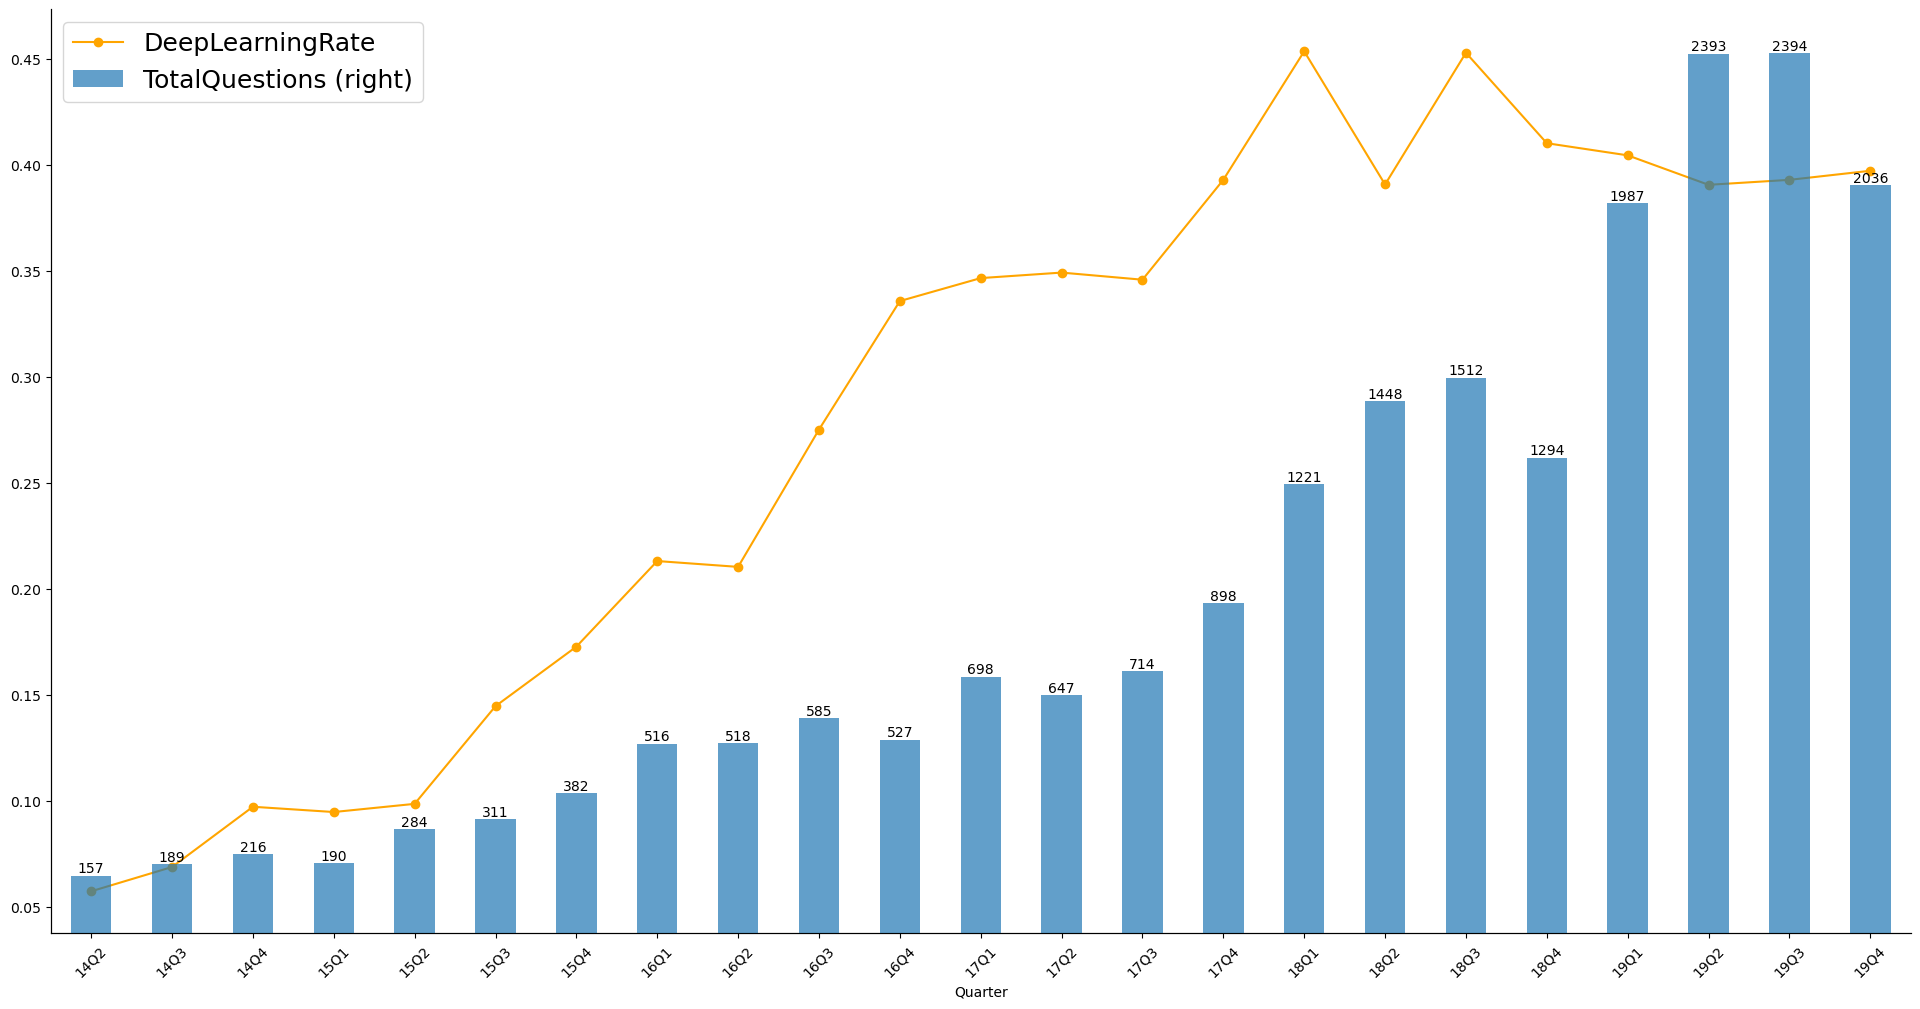

In [28]:
# Create the first axis for the line plot
ax1 = quarterly.plot(x="Quarter", y="DeepLearningRate",
                    kind="line", linestyle="-", marker="o", color="orange",
                    figsize=(24,12)
                    )

# Create the second axis for the bar plot, sharing the same x-axis with ax1
ax2 = quarterly.plot(x="Quarter", y="TotalQuestions",
                     kind="bar", ax=ax1, secondary_y=True, alpha=0.7, rot=45)

# Add data labels to the bar plot
for index, total in quarterly["TotalQuestions"].iteritems():
    ax2.text(index, total, str(total), ha="center", va="bottom")
    
# Get the x-axis limits of the first axis
xlims = ax1.get_xlim()

ax1.get_legend().remove()

# Get handles and labels for both axes' legends
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(handles=handles1 + handles2,
           labels=labels1 + labels2,
           loc="upper left", prop={"size": 18})

# Remove top and right spines, and right ticks from both axes
for ax in (ax1, ax2):
    for where in ("top", "right"):
        ax.spines[where].set_visible(False)
        ax.tick_params(right=False, labelright=False)

>- The percentage of deep learning questions grew drastically between 2014 (5%) and 2016 (over 30%). Though this growth appears to have plateaued, the proportion has been maintained above 30% from 2016 to date (about six years). It is clear from this observation that deep learning is not just a fad. It is a growing field of data science that sparked a strong initial interest and is still explored on DSSE to date.

## Conclusion
<hr>

In this project, we gathered, delved into, and examined data sourced from the Database of the Data Science Stack Exchange (DSSE). Our primary objective revolved around pinpointing the most widely discussed subject within the realm of Data Science. The purpose behind this was to harness these insights in the creation of captivating content tailored to our audience's preferences.

Our analysis led us to identify machine learning, python, and deep learning as the most prevalent subjects in the field of data science. Nevertheless, given the comprehensive scope of the first two options, we opted to concentrate on the more specialized domain of deep learning.

What emerged as intriguing was the surge in the popularity of deep learning within the DSSE community. Its prevalence skyrocketed from a mere 5% of total DSSE queries in 2014 to a staggering 30% by 2016. Notably, the prominence of deep learning has endured, consistently representing over 30% of all questions posed on DSSE up to the present time. This enduring trend underscores that deep learning isn't merely a passing trend; rather, it constitutes a burgeoning facet of data science that continues to captivate and intrigue practitioners over the long haul.

## Recommendations and Limitations
<hr>

>- Based on our findings, we recommend customizing our resources to focus on deep learning content due to its potential to drive audience interaction and engagement within the realm of data science.

>- While our research has led us to the conclusion that deep learning holds significant popularity, it's important to note that our insights are derived from a single source. Exploring data from additional data science platforms could bolster our confidence in these findings.

>- Furthermore, considering the inclusion of non-data-science topics in our content strategy could facilitate diversification, appealing to a broader audience over the long term.